In [87]:
import tensorflow as tf
import numpy as np

In [117]:
X = np.array([[0, 0], [0,1], [1,0], [1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [118]:
y = np.array([[1], [0], [0], [1]])
y

array([[1],
       [0],
       [0],
       [1]])

In [119]:
input_layer_neurons = 2
hidden_layer_neurons = 3
exit_layer_neurons = 1

In [120]:
W = {'hidden': tf.Variable(tf.random_normal([input_layer_neurons, hidden_layer_neurons]), name = 'w_oculta'), 
     'exit': tf.Variable(tf.random_normal([hidden_layer_neurons, exit_layer_neurons]), name = 'w_saida')}

In [121]:
type(W)

dict

In [122]:
type(W['hidden'])

tensorflow.python.ops.variables.RefVariable

In [123]:
W['hidden']

<tf.Variable 'w_oculta_5:0' shape=(2, 3) dtype=float32_ref>

In [124]:
W['exit']

<tf.Variable 'w_saida_5:0' shape=(3, 1) dtype=float32_ref>

In [125]:
distribution = np.random.normal(size=500)
distribution

array([ 0.13581288, -0.58165943,  0.02114194, -0.26270951,  1.97096463,
        1.50038412,  0.06570036,  0.53364889, -2.38548316, -0.43575178,
        1.06593548,  0.26392207,  0.03059211,  0.93977839,  0.07787603,
       -0.93943386, -0.98341687,  1.60547298,  0.85210134, -1.03411861,
        0.05812973, -0.50008778, -1.2291899 , -0.04975547,  1.9454703 ,
       -1.17529013,  0.98723306, -0.3551772 , -1.7979766 ,  0.37298149,
       -0.05526958, -0.85139376,  0.68691925, -0.85151066,  0.5388537 ,
       -1.11101296,  0.74220235, -0.30145718, -0.72409202,  1.08778094,
       -0.23873478, -1.50395581, -1.31690268, -0.39895592,  0.04159944,
       -0.65176863,  1.66190179,  0.994207  ,  0.04461212,  2.09321551,
       -0.66343838, -0.04251831, -0.15403383,  2.55319052,  0.07205401,
        0.48878072, -0.74468466, -0.6334833 ,  0.41521651,  1.74288815,
        0.13557255,  2.73397867, -0.79124652, -1.25308146,  0.10156191,
       -1.81371279, -2.73412676, -1.70339459,  1.40786142, -0.16

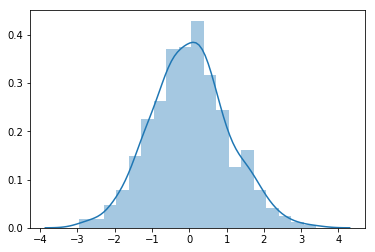

In [126]:
import seaborn as sns
sns.distplot(distribution)

In [127]:
bias = {'hidden': tf.Variable(tf.random_normal([hidden_layer_neurons]), name='hidden_bias'),
        'exit': tf.Variable(tf.random_normal([exit_layer_neurons]), name='exit_bias')}

In [128]:
xph = tf.placeholder(tf.float32, [4, input_layer_neurons], name = 'xph')
yph = tf.placeholder(tf.float32, [4, exit_layer_neurons], name = 'yph')

In [130]:
hidden_layer = tf.add(tf.matmul(xph, W['hidden']), bias['hidden'])
hidden_layer_activation = tf.sigmoid(hidden_layer)
exit_layer = tf.add(tf.matmul(hidden_layer_activation, W['exit']), bias['exit'])
exit_layer_activation = tf.sigmoid(exit_layer)

In [133]:
error = tf.losses.mean_squared_error(yph, exit_layer_activation)

In [134]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.3).minimize(error)

In [135]:
init = tf.global_variables_initializer()

In [149]:
with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(W['oculta']))
    #print(sess.run(W['saida']))
    #print(sess.run(bias['hidden']))
    #print(sess.run(bias['exit']))
    #print(sess.run(hidden_layer, feed_dict= {xph: X}))
    #print('\n')
    #print(sess.run(hidden_layer_activation, feed_dict = {xph: X}))
    #print('\n')
    #print(sess.run(exit_layer_activation, feed_dict = {xph: X}))
    for epochs in range(10000):
        mean_error = 0
        _, cost = sess.run([optimizer, error], feed_dict = {xph: X, yph: y})
        if (epochs % 200 == 0):
            #print(cost)
            mean_error += cost / 4
            print(mean_error)
    final_W, final_bias = sess.run([W, bias])

0.11485172063112259
0.05942189693450928
0.055017583072185516
0.04762538522481918
0.03752211481332779
0.026456193998456
0.01727970317006111
0.011302053928375244
0.007764871697872877
0.005649571772664785
0.004320361651480198
0.003438185201957822
0.0028232510667294264
0.0023764558136463165
0.0020404518581926823
0.0017804137896746397
0.001574281370267272
0.001407537260092795
0.0012703093234449625
0.0011556840036064386
0.0010586967691779137
0.0009757085936143994
0.0009039908181875944
0.0008414674666710198
0.0007865317165851593
0.000737920287065208
0.0006946370704099536
0.0006558754830621183
0.0006209799321368337
0.0005894172936677933
0.000560743035748601
0.0005345882382243872
0.0005106464959681034
0.000488651916384697
0.00046838418347761035
0.0004496511828619987
0.0004322904860600829
0.0004161591059528291
0.00040113471914082766
0.00038710894295945764
0.0003739884705282748
0.00036169018130749464
0.0003501395112834871
0.0003392738872207701
0.00032903498504310846
0.0003193692537024617
0.000310

In [150]:
final_W

{'hidden': array([[ 4.4720697, -6.029655 , -2.8111088],
        [-3.2730153, -4.94407  , -4.768001 ]], dtype=float32),
 'exit': array([[ 4.369104],
        [ 8.488173],
        [-8.129021]], dtype=float32)}

In [151]:
final_bias

{'hidden': array([2.263262 , 2.2219012, 5.511785 ], dtype=float32),
 'exit': array([-0.05965011], dtype=float32)}

In [152]:
#TEST
hidden_layer_test = tf.add(tf.matmul(xph, final_W['hidden']), bias['hidden'])
hidden_layer_activation_test = tf.sigmoid(hidden_layer_test)
exit_layer_test = tf.add(tf.matmul(hidden_layer_activation_test, final_W['exit']), bias['exit'])
exit_layer_activation_test = tf.sigmoid(exit_layer_test)

In [155]:
with tf.Session() as ses:
    ses.run(init)
    print(ses.run(exit_layer_activation_test, feed_dict = {xph: X}))

[[0.87588423]
 [0.5727681 ]
 [0.9860629 ]
 [0.96130395]]
